데이터셋 정리


- data : seoul_filtered_1010.csv 
    - 
- filtered_data : 음식점행 추출 (571991행)
    - 전체행에서 '업태명'으로 카페,주점 제외
- df1 = food_data : 변수 정리 (571991행)
- df2 = food_data_2010up (365651행)
- df3 = 영업자시작일 결측치 허가신고일로 대체, 업소명 결측치 행 제거 (365650행)
- df4 = 소재지 앞,뒤 변수 추가 (365650행)
- df5 = food_xy 
- df6 : 
- df7 : (365650행) 
- df8 : 행정구명 서울 아닌 곳 제외 (365638행) 

- df8_1 : 좌표 결측치행과 전체행의 행정구명 비율

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 모든 열이 출력되도록 설정
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv("C:/Users/foma/Documents/카카오톡 받은 파일/seoul_filtered_1010.csv") 

C:\Users\foma\AppData\Local\Temp\ipykernel_11628\1933748128.py:1: DtypeWarning: Columns (10,12,15,19,28,30,35,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/foma/Documents/카카오톡 받은 파일/seoul_filtered_1010.csv")


주점 제외한 음식점 행 추출

# 음식점 행 추출
주점 제외한 음식점 행 추출
업종명 업태명 업소명 

In [5]:
data['업종명'].unique()

array(['일반음식점', '휴게음식점'], dtype=object)

In [6]:
data['업태명'][data['업종명']=='일반음식점'].unique()

array(['중국식', '외국음식전문점(인도,태국등)', '기타', '한식', '경양식', '호프/통닭', '감성주점', '분식',
       '일식', '식육(숯불구이)', '김밥(도시락)', '정종/대포집/소주방', '뷔페식', '탕류(보신용)',
       '라이브카페', '회집', '키즈카페', '출장조리', '패밀리레스트랑', '냉면집', '복어취급', nan,
       '통닭(치킨)', '까페', '패스트푸드', '도매업(유통)', '식품소분업', '전통찻집', '이동조리',
       '일반조리판매', '커피숍', '제과점영업', '룸살롱', '다방', '식품제조가공업', '기타 휴게음식점',
       '식품등 수입판매업', '간이주점', '서울특별시 도봉구로 전출처리됨',
       '사업자등록 폐업에 따른 영업신고사항 직권말소', '서울특별시 양천구로 전출처리됨',
       '서울특별시 영등포구로 전출처리됨', '서울특별시 광진구로 전출처리됨', '무단폐업에 따른 직권말소',
       '경기도 구리시로 전출처리됨', '서울특별시 강서구로 전출처리됨'], dtype=object)

In [7]:
data['업태명'][data['업종명']=='휴게음식점'].unique()

array(['일반조리판매', '기타 휴게음식점', '아이스크림', '커피숍', '푸드트럭', '다방', '전통찻집', '편의점',
       '패스트푸드', '키즈카페', '백화점', '떡카페', '철도역구내', '극장', '유원지', '고속도로',
       '관광호텔', '공항', '한식', '룸살롱', '과자점', '기타', '호프/통닭', '김밥(도시락)', '단란주점',
       nan, '서울특별시 성북구로 전출처리됨', '착오신고로인한 폐업후 재처리', '서울특별시 도봉구로 전출처리됨'],
      dtype=object)

전체 행에서 카페,주점 제외

In [8]:
# 제외할 '업태명' 리스트
exclude_list = [
    '감성 주점', '호프/통닭', '정종/대포집/소주방', '기타 휴게음식점', '편의점', '아이스크림',
    '커피숍', '다방', '전통찻집', '라이브카페', '키즈카페', '백화점', '떡카페', '까페',
    '도매업(유통)', '룸살롱', '식품소분업', '과자점', '이동조리', '제과점영업',
    '식품제조가공업', '식품등 수입판매업', '단란주점', '간이주점', '철도역구내', '극장', 
    '유원지', '룸살롱', '식품소분업', '제과점영업'
]

# '업태명'이 exclude_list에 포함되지 않은 행만 필터링
filtered_data = data[~data['업태명'].isin(exclude_list)]

In [9]:
filtered_data.info()  # 571991

<class 'pandas.core.frame.DataFrame'>
Index: 571991 entries, 0 to 758624
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   시군구코드          571991 non-null  int64  
 1   업종코드           571991 non-null  int64  
 2   년도             571991 non-null  int64  
 3   업소일련번호         571991 non-null  int64  
 4   업종명            571991 non-null  object 
 5   허가신고일          571991 non-null  int64  
 6   업소명            571988 non-null  object 
 7   소재지도로명         571991 non-null  object 
 8   소재지지번          571501 non-null  object 
 9   영업장면적(㎡)       270097 non-null  float64
 10  영업자시작일         570938 non-null  object 
 11  법인명            45643 non-null   object 
 12  법인번호           43859 non-null   object 
 13  소재지시작일         570214 non-null  float64
 14  행정동명           570449 non-null  object 
 15  폐업일자           340334 non-null  object 
 16  폐업구분           338641 non-null  object 
 17  폐업사유           220723 non-null  ob

# filtered_dat 변수 정리
- 이 데이터셋은 카페데이터셋에 개업시점기준(카페 개업 이전 달에 반경 내 음식점 개수) 음식점 개수 변수로 들어갈 것이기 때문에 관련 없는 행들을 제외해준다. 

In [10]:
filtered_data.columns

Index(['시군구코드', '업종코드', '년도', '업소일련번호', '업종명', '허가신고일', '업소명', '소재지도로명',
       '소재지지번', '영업장면적(㎡)', '영업자시작일', '법인명', '법인번호', '소재지시작일', '행정동명', '폐업일자',
       '폐업구분', '폐업사유', '업태명', '지상_부터', '지상_까지', '지하_부터', '지하_까지', '총층수',
       '교육수료일자', '모범음식점여부', '급수시설', '업소위치', '종업원남', '종업원여', '급식소종류', '평균급식인원수',
       '최대급식인원수', '1일급식인원수', '일인당평균급식비', '운영형태', '영업장조리장면적(㎡)', '영업장객실면적(㎡)',
       '영업장무도장면적(㎡)', '영업장기타면적(㎡)', '업소내화장실면적(㎡)', '타업소공동화장실면적(㎡)',
       '영업장탈의실면적(㎡)', '영업장객석면적(㎡)', '작업장면적(㎡)', '검사실면적(㎡)', '진열(판매)대면적(㎡)',
       '창고(보관소)면적(㎡)', '허가(신고)번호', '조건부허가시작일', '조건부허가종료일', '내외국인구분', '국적'],
      dtype='object')

In [11]:
food_data = filtered_data[['업소명','업종명','업태명','소재지도로명','소재지지번','허가신고일','영업자시작일','소재지시작일','행정동명','폐업일자','폐업구분','폐업사유']]

In [12]:
food_data

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유
0,청수장A,일반음식점,중국식,"서울특별시 종로구 돈화문로5가길 1, 피카디리플러스 6층 6-30호 (돈의동)",서울특별시 종로구 돈의동 137번지 피카디리플러스,20190118,20190118,20190118.0,종로1.2.3.4가동,20200225.0,자진폐업,NaN
1,아주로,일반음식점,"외국음식전문점(인도,태국등)","서울특별시 종로구 자하문로7길 68-2, 지하1층 (누하동)",서울특별시 종로구 누하동 1번지 11호,20190311,20190311,20190311.0,청운효자동,NaN,NaN,NaN
2,낙산길 20,일반음식점,기타,"서울특별시 종로구 낙산길 20, 1층 (동숭동)",서울특별시 종로구 동숭동 129번지 144호,20190729,20190729,20190729.0,이화동,NaN,NaN,NaN
3,교동집,일반음식점,한식,"서울특별시 종로구 사직로8길 4, 301동 B1층 113-5호 (사직동, 광화문 풍...",서울특별시 종로구 사직동 9번지 광화문 풍림스페이스본,20190920,20190920,20190920.0,사직동,NaN,NaN,NaN
4,동묘마케트,일반음식점,"외국음식전문점(인도,태국등)","서울특별시 종로구 종로54길 17-10, 지하1층 (창신동)",서울특별시 종로구 창신동 330번지 53호,20190523,20190523,20190523.0,창신제1동,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
758618,국밥조아,일반음식점,한식,"서울특별시 금천구 시흥대로 274, 천세약국 지상1층 일부호 (독산동)",서울특별시 금천구 독산동 1077번지 37호 천세약국,20240102,20240102,20240102.0,독산제1동,NaN,NaN,NaN
758619,식탐 한식부페,일반음식점,뷔페식,"서울특별시 동대문구 사가정로 260, 1층 (장안동)",서울특별시 동대문구 장안동 314번지 4호,20240102,20240102,20240102.0,장안제1동,NaN,NaN,NaN
758620,바카우마카레(BAKAUMACURRY),일반음식점,기타,"서울특별시 중랑구 봉우재로 136, 1층 (면목동)",서울특별시 중랑구 면목동 91번지 31호,20240102,20240102,20240102.0,면목본동,NaN,NaN,NaN
758623,(주)카우엔,일반음식점,기타,"서울특별시 노원구 동일로 1414, 롯데백화점 지하1층 일부호 (상계동)",서울특별시 노원구 상계동 713번지 롯데백화점,20231229,20231229,20231229.0,상계2동,20240121.0,기타,조건부기간 완료에 따른 폐업처리(자동폐업)


In [13]:
food_data['업태명'].unique()

array(['중국식', '외국음식전문점(인도,태국등)', '기타', '한식', '경양식', '감성주점', '분식', '일식',
       '식육(숯불구이)', '김밥(도시락)', '뷔페식', '일반조리판매', '푸드트럭', '패스트푸드', '탕류(보신용)',
       '회집', '출장조리', '패밀리레스트랑', '냉면집', '복어취급', '고속도로', nan, '관광호텔', '공항',
       '통닭(치킨)', '서울특별시 도봉구로 전출처리됨', '사업자등록 폐업에 따른 영업신고사항 직권말소',
       '서울특별시 양천구로 전출처리됨', '서울특별시 성북구로 전출처리됨', '서울특별시 영등포구로 전출처리됨',
       '서울특별시 광진구로 전출처리됨', '무단폐업에 따른 직권말소', '경기도 구리시로 전출처리됨',
       '착오신고로인한 폐업후 재처리', '서울특별시 강서구로 전출처리됨'], dtype=object)

In [14]:
# '업소명'이 중복된 값을 가진 행들을 필터링
duplicate_names = food_data[food_data.duplicated(subset='업소명', keep=False)]

In [15]:
duplicate_names 
#프랜차이즈 음식명은 업소명이 같은 것이 많음

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유
3,교동집,일반음식점,한식,"서울특별시 종로구 사직로8길 4, 301동 B1층 113-5호 (사직동, 광화문 풍...",서울특별시 종로구 사직동 9번지 광화문 풍림스페이스본,20190920,20190920,20190920.0,사직동,NaN,NaN,NaN
5,명화담다,일반음식점,기타,"서울특별시 종로구 종로 80-2, 삼양빌딩 5층 (종로2가)",서울특별시 종로구 종로2가 75번지 6호 삼양빌딩 5층,20190814,20200529,20190814.0,종로1.2.3.4가동,NaN,NaN,NaN
12,커피사피엔스 경복궁역점,일반음식점,기타,"서울특별시 종로구 사직로 130, 적선현대빌딩 지하1층 제66호 (적선동)",서울특별시 종로구 적선동 80번지 적선현대빌딩,20190321,20190321,20190321.0,사직동,NaN,NaN,NaN
13,쉐이크쉑 종각점,일반음식점,기타,"서울특별시 종로구 종로 33, 그랑서울 1층 122~135호 (청진동)",서울특별시 종로구 청진동 70번지 그랑서울,20190802,20190802,20190802.0,종로1.2.3.4가동,NaN,NaN,NaN
14,커피사피엔스 경복궁역점,일반음식점,기타,"서울특별시 종로구 사직로 130, 적선현대빌딩 지하1층 제66호 (적선동)",서울특별시 종로구 적선동 80번지 적선현대빌딩,20190321,20190705,20190321.0,사직동,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
758577,파파스낵,일반음식점,분식,"서울특별시 양천구 중앙로 340, 1층 (신정동)",서울특별시 양천구 신정동 939번지 1호,20240102,20240102,20240102.0,신정4동,NaN,NaN,NaN
758609,땡초곱창,일반음식점,한식,"서울특별시 구로구 서해안로 2124, 가온주차타워 1층 103호 (항동)",서울특별시 구로구 항동 238번지 1호,20240102,20240102,20240102.0,항동,NaN,NaN,NaN
758611,송정각,일반음식점,중국식,"서울특별시 광진구 천호대로102길 35, 1층 (군자동)",서울특별시 광진구 군자동 465번지 17호,20240102,20240102,20240102.0,군자동,NaN,NaN,NaN
758623,(주)카우엔,일반음식점,기타,"서울특별시 노원구 동일로 1414, 롯데백화점 지하1층 일부호 (상계동)",서울특별시 노원구 상계동 713번지 롯데백화점,20231229,20231229,20231229.0,상계2동,20240121.0,기타,조건부기간 완료에 따른 폐업처리(자동폐업)


In [16]:
food_data[food_data['업태명'] == '서울특별시 도봉구로 전출처리됨']

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유
678113,황박사 부대찌개,일반음식점,서울특별시 도봉구로 전출처리됨,"서울특별시 강북구 인수봉로78길 18, 1층 가운데호 (수유동)",서울특별시 강북구 수유동 551번지 1호,20200204,NaN,NaN,20200204,인수동,20210511.0,전출
679930,충무할매김밥 앤 돈까스,휴게음식점,서울특별시 도봉구로 전출처리됨,"서울특별시 동대문구 답십리로66길 102-2, 1층 (장안동)",서울특별시 동대문구 장안동 184번지 24호,20200221,NaN,NaN,20200221,장안제1동,20210531.0,전출
679931,장안홈타운분식,휴게음식점,서울특별시 도봉구로 전출처리됨,"서울특별시 동대문구 답십리로66길 102-2, 1층 (장안동)",서울특별시 동대문구 장안동 184번지 24호,20200221,NaN,NaN,20200221,장안제1동,20210531.0,전출


In [17]:
# food_data를 CSV 파일로 내보내기
# food_data.to_csv("food_data.csv", index=False, encoding='utf-8-sig')

In [18]:
food_data.shape

(571991, 12)

# 전처리
- 행정동명 폐업일자 값 이상한 거 바꿔
- 폐업구분 폐업사유 이상한 거 바꿔
- 좌표 변환(원철 코드)
1) '폐업일자' 이상치 보기 > 2010전에 폐업한 행 삭제  (365651행)
1) 영업자 시작일 결측치 처리

In [19]:
df1 = food_data.copy()

In [20]:
food_data.info() #571991

<class 'pandas.core.frame.DataFrame'>
Index: 571991 entries, 0 to 758624
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   업소명     571988 non-null  object 
 1   업종명     571991 non-null  object 
 2   업태명     569837 non-null  object 
 3   소재지도로명  571991 non-null  object 
 4   소재지지번   571501 non-null  object 
 5   허가신고일   571991 non-null  int64  
 6   영업자시작일  570938 non-null  object 
 7   소재지시작일  570214 non-null  float64
 8   행정동명    570449 non-null  object 
 9   폐업일자    340334 non-null  object 
 10  폐업구분    338641 non-null  object 
 11  폐업사유    220723 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 56.7+ MB


In [21]:
food_data.isna().sum()

업소명            3
업종명            0
업태명         2154
소재지도로명         0
소재지지번        490
허가신고일          0
영업자시작일      1053
소재지시작일      1777
행정동명        1542
폐업일자      231657
폐업구분      233350
폐업사유      351268
dtype: int64

### 폐업일자

In [22]:
# '폐업일자'를 문자열로 변환한 후 소수점 제거
food_data['폐업일자'] = food_data['폐업일자'].astype(str).str.replace('.0', '', regex=False)
# 날짜 형식으로 변환
food_data['폐업일자'] = pd.to_datetime(food_data['폐업일자'], format='%Y%m%d', errors='coerce')

C:\Users\foma\AppData\Local\Temp\ipykernel_11628\729590319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data['폐업일자'] = food_data['폐업일자'].astype(str).str.replace('.0', '', regex=False)
C:\Users\foma\AppData\Local\Temp\ipykernel_11628\729590319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data['폐업일자'] = pd.to_datetime(food_data['폐업일자'], format='%Y%m%d', errors='coerce')


In [23]:
# 2010-01-01 전에 폐업한 행 삭제
food_data_2010up = food_data[(food_data['폐업일자'] >= '2010-01-01') | (food_data['폐업일자'].isna())]

In [24]:
df2 = food_data_2010up.copy()

In [25]:
food_data_2010up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365651 entries, 0 to 758624
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   업소명     365650 non-null  object        
 1   업종명     365651 non-null  object        
 2   업태명     363498 non-null  object        
 3   소재지도로명  365651 non-null  object        
 4   소재지지번   365161 non-null  object        
 5   허가신고일   365651 non-null  int64         
 6   영업자시작일  364598 non-null  object        
 7   소재지시작일  363874 non-null  float64       
 8   행정동명    365166 non-null  object        
 9   폐업일자    131824 non-null  datetime64[ns]
 10  폐업구분    132343 non-null  object        
 11  폐업사유    99261 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 36.3+ MB


### 영업자시작일 결측치 처리
- 허가신고일로 대체

In [26]:
food_data_2010up['영업자시작일'].isna().sum() 

1053

In [27]:
food_data_2010up['영업자시작일'] = food_data_2010up['영업자시작일'].fillna(food_data_2010up['허가신고일'])

C:\Users\foma\AppData\Local\Temp\ipykernel_11628\2230772974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data_2010up['영업자시작일'] = food_data_2010up['영업자시작일'].fillna(food_data_2010up['허가신고일'])


In [28]:
food_data_2010up['영업자시작일'].isna().sum() 

0

### 업소명 결측치 
- 한 개의 결측치 존재. 검색해보니 카페여서 행 제거.

In [29]:
food_data_2010up[food_data_2010up['업소명'].isna()]

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유
28622,NaN,일반음식점,기타,"서울특별시 중구 창경궁로5길 27, 2층 (을지로4가)",서울특별시 중구 을지로4가 35번지 2층,20180710,20180710,20180710.0,을지로동,NaT,NaN,NaN


In [30]:
food_data_2010up = food_data_2010up.drop(index=28622)

In [31]:
food_data_2010up[food_data_2010up['업소명'].isna()] # 삭제 완료

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유


### 소재지도로명 결측치 
- 결측치는 없음

In [32]:
food_data_2010up['소재지도로명'].isna().sum()

0

In [33]:
df3 = food_data_2010up.copy()

### 도로명 > 좌표 변환

In [34]:
# 소재지도로명 열을 쉼표(,) 기준으로 분리하여 두 개의 새로운 열 생성
food_data_2010up[['소재지_앞', '소재지_뒤']] = food_data_2010up['소재지도로명'].str.split(',', n=1, expand=True)

In [35]:
df4 = food_data_2010up.copy()

In [37]:
food_data_2010up.to_csv("food_data_2010up.csv",index = False , encoding = 'utf-8-sig')

In [38]:
food_data_2010up.shape

(365650, 14)

In [43]:
food_data_2010up['소재지_앞'].head()

0      서울특별시 종로구 돈화문로5가길 1
1    서울특별시 종로구 자하문로7길 68-2
2         서울특별시 종로구 낙산길 20
3        서울특별시 종로구 사직로8길 4
4    서울특별시 종로구 종로54길 17-10
Name: 소재지_앞, dtype: object

In [42]:
import pandas as pd
import requests

# 네이버 API 클라이언트 정보
client_id = "3fmd7xia0h"
client_secret = "uy5gOT87pjBgIeAmXCH2dpXVBKK090HceaprqeKL"

# API 요청 함수 정의
def get_coordinates(address):
    endpoint = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode"
    url = f"{endpoint}?query={address}"

    # API 요청 헤더
    headers = {
        "X-NCP-APIGW-API-KEY-ID": client_id,
        "X-NCP-APIGW-API-KEY": client_secret,
    }

    # API 호출 및 좌표 추출
    res = requests.get(url, headers=headers)
    if res.status_code == 200:
        data = res.json()
        if data['status'] == 'OK' and data['meta']['totalCount'] > 0:
            x = data['addresses'][0]['x']
            y = data['addresses'][0]['y']
            return pd.Series([x, y])
    return pd.Series([None, None])

In [89]:
get_coordinates("서울특별시 종로구 돈화문로5가길 1, 피카디리플러스 6층 6-30호 (돈의동)")

0    126.9912405
1     37.5710346
dtype: object

In [52]:
get_coordinates("서울특별시 종로구 돈화문로5가길 1")

0    127.0240230
1     37.5464487
dtype: object

In [54]:
# 주소 열에 대해 좌표를 적용하여 x, y 좌표 열 추가
df4[['x', 'y']] = df4['소재지_앞'].apply(get_coordinates)

# 결과 확인
df4.head()

KeyboardInterrupt: 

In [60]:
df4 = df4.reset_index(drop=True)

In [40]:
df4.loc[0]

업소명                                              청수장A
업종명                                             일반음식점
업태명                                               중국식
소재지도로명    서울특별시 종로구 돈화문로5가길 1, 피카디리플러스 6층 6-30호 (돈의동)
소재지지번                   서울특별시 종로구 돈의동  137번지  피카디리플러스
허가신고일                                        20190118
영업자시작일                                       20190118
소재지시작일                                     20190118.0
행정동명                                      종로1.2.3.4가동
폐업일자                              2020-02-25 00:00:00
폐업구분                                             자진폐업
폐업사유                                              NaN
소재지_앞                             서울특별시 종로구 돈화문로5가길 1
소재지_뒤                          피카디리플러스 6층 6-30호 (돈의동)
Name: 0, dtype: object

In [43]:
get_coordinates('서울특별시 종로구 돈화문로5가길 1')

0    126.9912405
1     37.5710346
dtype: object

In [62]:
df4.loc[146]

업소명                               십리향
업종명                             일반음식점
업태명                               중국식
소재지도로명    서울특별시 종로구 명륜길 46, 1층 (명륜3가)
소재지지번      서울특별시 종로구 명륜3가  1번지 189호  
허가신고일                        20190730
영업자시작일                       20191002
소재지시작일                     20190730.0
행정동명                              혜화동
폐업일자                              NaT
폐업구분                              NaN
폐업사유                              NaN
소재지_앞                서울특별시 종로구 명륜길 46
소재지_뒤                       1층 (명륜3가)
Name: 146, dtype: object

In [63]:
get_coordinates("서울특별시 종로구 명륜길 46")

0    126.9948644
1     37.5891074
dtype: object

In [64]:
df4.loc[147]

업소명                         커플이야
업종명                        일반음식점
업태명                           기타
소재지도로명                          
소재지지번     서울특별시 종로구 익선동  148번지  
허가신고일                   20190812
영업자시작일                  20190812
소재지시작일                20190812.0
행정동명                 종로1.2.3.4가동
폐업일자                         NaT
폐업구분                         NaN
폐업사유                         NaN
소재지_앞                           
소재지_뒤                       None
Name: 147, dtype: object

In [45]:
get_coordinates(' 서울특별시 종로구 경교장길 35')

0    126.9659909
1     37.5691438
dtype: object

In [65]:
df4.loc[1234]

업소명                                Xiawu(시아우)545
업종명                                        일반음식점
업태명                                          중국식
소재지도로명    서울특별시 중구 명동길 14, Noon Square 6층 (명동2가)
소재지지번        서울특별시 중구 명동2가  83번지 5호  Noon Square
허가신고일                                   20190122
영업자시작일                                  20190122
소재지시작일                                20190122.0
행정동명                                          명동
폐업일자                                         NaT
폐업구분                                         NaN
폐업사유                                         NaN
소재지_앞                            서울특별시 중구 명동길 14
소재지_뒤                      Noon Square 6층 (명동2가)
Name: 1234, dtype: object

In [66]:
get_coordinates('서울특별시 중구 명동길 14')

0    126.9828804
1     37.5634327
dtype: object

In [67]:
df4.loc[1235]

업소명                                                 광주수산
업종명                                                일반음식점
업태명                                                   일식
소재지도로명    서울특별시 중구 퇴계로85길 지하 56, 신당지하쇼핑센터 지하1층 55호 (황학동)
소재지지번                   서울특별시 중구 황학동  370번지 1호  신당지하쇼핑센터
허가신고일                                           20190312
영업자시작일                                          20190312
소재지시작일                                        20190312.0
행정동명                                                 황학동
폐업일자                                                 NaT
폐업구분                                                 NaN
폐업사유                                                 NaN
소재지_앞                              서울특별시 중구 퇴계로85길 지하 56
소재지_뒤                            신당지하쇼핑센터 지하1층 55호 (황학동)
Name: 1235, dtype: object

In [68]:
get_coordinates("서울특별시 중구 퇴계로85길 지하 56")

0    None
1    None
dtype: object

In [50]:
df4['소재지_앞'].head()

0      서울특별시 종로구 돈화문로5가길 1
1    서울특별시 종로구 자하문로7길 68-2
2         서울특별시 종로구 낙산길 20
3        서울특별시 종로구 사직로8길 4
4    서울특별시 종로구 종로54길 17-10
Name: 소재지_앞, dtype: object

# 파생변수 생성 코드

In [69]:
food_xy = df4.copy()

### 도로명에서 '지하' 뺀 변수 만들기

In [70]:
food_xy['소재지_앞_지하X'] = food_xy['소재지_앞'].str.replace('지하', '', regex=False).str.replace(r'\s+', ' ', regex=True).str.strip()

In [71]:
food_xy.loc[1235]['소재지_앞_지하X']

'서울특별시 중구 퇴계로85길 56'

In [84]:
food_xy[food_xy['소재지도로명'] == '    ']

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유,소재지_앞,소재지_뒤,소재지_앞_지하X
147,커플이야,일반음식점,기타,,서울특별시 종로구 익선동 148번지,20190812,20190812,20190812.0,종로1.2.3.4가동,NaT,NaN,NaN,,None,
3099,뚝섬수영장 카페테리아,휴게음식점,패스트푸드,,서울특별시 광진구 자양동 112번지 1층 한강뚝섬 수영장내,20190715,20190715,20190715.0,자양제3동,2019-08-25,기타,조건부기간 완료에 따른 폐업처리,,None,
3672,커피하우스(푸드트럭),휴게음식점,푸드트럭,,서울특별시 동대문구 장안동 24번지 2호 중랑천 제1체육공원 푸드트럭존,20191212,20191212,20191212.0,장안제1동,NaT,NaN,NaN,,None,
4084,가우리,일반음식점,한식,,서울특별시 중랑구 망우동 26번지 현장식당,20190603,20190603,20190603.0,망우제3동,NaT,NaN,NaN,,None,
4119,부엉이푸드,휴게음식점,푸드트럭,,서울특별시 중랑구 면목동 1506번지 3호 면목천로변 거주자우선 주차구역 36-...,20190917,20190917,20190917.0,면목제2동,NaT,NaN,NaN,,None,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363302,서대문지역자활센터 카페사업단 '커피지기' (88로3890),휴게음식점,푸드트럭,,서울특별시 서대문구 연희동 산 2번지 22호,20240305,20240305,20240305.0,연희동,NaT,NaN,NaN,,None,
363757,소소한날,일반음식점,기타,,서울특별시 영등포구 문래동3가 55번지 6호 문래동 공공용지 도시텃밭,20240222,20240222,20240222.0,문래동,2024-02-25,기타,조건부기간 완료에 따른 폐업처리(자동폐업),,None,
363844,반서울(Vam Seoul),일반음식점,일식,,서울특별시 영등포구 문래동2가 49번지 1층,20240220,20240220,20240220.0,문래동,NaT,NaN,NaN,,None,
363939,장군집2호점 장군식당,일반음식점,기타,,서울특별시 영등포구 양평동 488번지,20240219,20240219,20240219.0,양평제2동,2024-02-24,기타,조건부기간 완료에 따른 폐업처리(자동폐업),,None,


In [87]:
for i in range(len(food_xy)):
    if food_xy.iloc[i,3] == '    ':
        food_xy.iloc[i,3] = None 

In [88]:
food_xy.shape

(365650, 15)

In [89]:
food_xy['소재지도로명'].isna().sum()

34691

In [91]:
df6 = food_xy.copy()

In [73]:
xy = pd.read_csv("C:/Users/foma/Documents/카카오톡 받은 파일/food_xy.csv")

In [74]:
xy.shape

(365650, 3)

In [106]:
# 두 데이터프레임을 옆으로 합치기 (열 기준으로 합침) 
combined_df = pd.concat([food_xy, xy], axis=1) 

TypeError: concat() got an unexpected keyword argument 'index'

In [77]:
combined_df.head()

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유,소재지_앞,소재지_뒤,소재지_앞_지하X,Unnamed: 0,0,1
0,청수장A,일반음식점,중국식,"서울특별시 종로구 돈화문로5가길 1, 피카디리플러스 6층 6-30호 (돈의동)",서울특별시 종로구 돈의동 137번지 피카디리플러스,20190118,20190118,20190118.0,종로1.2.3.4가동,2020-02-25,자진폐업,NaN,서울특별시 종로구 돈화문로5가길 1,피카디리플러스 6층 6-30호 (돈의동),서울특별시 종로구 돈화문로5가길 1,0,126.991241,37.571035
1,아주로,일반음식점,"외국음식전문점(인도,태국등)","서울특별시 종로구 자하문로7길 68-2, 지하1층 (누하동)",서울특별시 종로구 누하동 1번지 11호,20190311,20190311,20190311.0,청운효자동,NaT,NaN,NaN,서울특별시 종로구 자하문로7길 68-2,지하1층 (누하동),서울특별시 종로구 자하문로7길 68-2,1,126.969142,37.580278
2,낙산길 20,일반음식점,기타,"서울특별시 종로구 낙산길 20, 1층 (동숭동)",서울특별시 종로구 동숭동 129번지 144호,20190729,20190729,20190729.0,이화동,NaT,NaN,NaN,서울특별시 종로구 낙산길 20,1층 (동숭동),서울특별시 종로구 낙산길 20,2,127.005581,37.580396
3,교동집,일반음식점,한식,"서울특별시 종로구 사직로8길 4, 301동 B1층 113-5호 (사직동, 광화문 풍...",서울특별시 종로구 사직동 9번지 광화문 풍림스페이스본,20190920,20190920,20190920.0,사직동,NaT,NaN,NaN,서울특별시 종로구 사직로8길 4,"301동 B1층 113-5호 (사직동, 광화문 풍림스페이스본)",서울특별시 종로구 사직로8길 4,3,126.968601,37.574404
4,동묘마케트,일반음식점,"외국음식전문점(인도,태국등)","서울특별시 종로구 종로54길 17-10, 지하1층 (창신동)",서울특별시 종로구 창신동 330번지 53호,20190523,20190523,20190523.0,창신제1동,NaT,NaN,NaN,서울특별시 종로구 종로54길 17-10,지하1층 (창신동),서울특별시 종로구 종로54길 17-10,4,127.014533,37.571795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365645,국밥조아,일반음식점,한식,"서울특별시 금천구 시흥대로 274, 천세약국 지상1층 일부호 (독산동)",서울특별시 금천구 독산동 1077번지 37호 천세약국,20240102,20240102,20240102.0,독산제1동,NaT,NaN,NaN,서울특별시 금천구 시흥대로 274,천세약국 지상1층 일부호 (독산동),서울특별시 금천구 시흥대로 274,365645,126.899697,37.458138
365646,식탐 한식부페,일반음식점,뷔페식,"서울특별시 동대문구 사가정로 260, 1층 (장안동)",서울특별시 동대문구 장안동 314번지 4호,20240102,20240102,20240102.0,장안제1동,NaT,NaN,NaN,서울특별시 동대문구 사가정로 260,1층 (장안동),서울특별시 동대문구 사가정로 260,365646,127.073710,37.579159
365647,바카우마카레(BAKAUMACURRY),일반음식점,기타,"서울특별시 중랑구 봉우재로 136, 1층 (면목동)",서울특별시 중랑구 면목동 91번지 31호,20240102,20240102,20240102.0,면목본동,NaT,NaN,NaN,서울특별시 중랑구 봉우재로 136,1층 (면목동),서울특별시 중랑구 봉우재로 136,365647,127.088134,37.592918
365648,(주)카우엔,일반음식점,기타,"서울특별시 노원구 동일로 1414, 롯데백화점 지하1층 일부호 (상계동)",서울특별시 노원구 상계동 713번지 롯데백화점,20231229,20231229,20231229.0,상계2동,2024-01-21,기타,조건부기간 완료에 따른 폐업처리(자동폐업),서울특별시 노원구 동일로 1414,롯데백화점 지하1층 일부호 (상계동),서울특별시 노원구 동일로 1414,365648,127.061115,37.655110


In [107]:
combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]

In [108]:
combined_df.head()

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유,소재지_앞,소재지_뒤,소재지_앞_지하X,0,1
0,청수장A,일반음식점,중국식,"서울특별시 종로구 돈화문로5가길 1, 피카디리플러스 6층 6-30호 (돈의동)",서울특별시 종로구 돈의동 137번지 피카디리플러스,20190118,20190118,20190118.0,종로1.2.3.4가동,2020-02-25,자진폐업,NaN,서울특별시 종로구 돈화문로5가길 1,피카디리플러스 6층 6-30호 (돈의동),서울특별시 종로구 돈화문로5가길 1,126.991241,37.571035
1,아주로,일반음식점,"외국음식전문점(인도,태국등)","서울특별시 종로구 자하문로7길 68-2, 지하1층 (누하동)",서울특별시 종로구 누하동 1번지 11호,20190311,20190311,20190311.0,청운효자동,NaT,NaN,NaN,서울특별시 종로구 자하문로7길 68-2,지하1층 (누하동),서울특별시 종로구 자하문로7길 68-2,126.969142,37.580278
2,낙산길 20,일반음식점,기타,"서울특별시 종로구 낙산길 20, 1층 (동숭동)",서울특별시 종로구 동숭동 129번지 144호,20190729,20190729,20190729.0,이화동,NaT,NaN,NaN,서울특별시 종로구 낙산길 20,1층 (동숭동),서울특별시 종로구 낙산길 20,127.005581,37.580396
3,교동집,일반음식점,한식,"서울특별시 종로구 사직로8길 4, 301동 B1층 113-5호 (사직동, 광화문 풍...",서울특별시 종로구 사직동 9번지 광화문 풍림스페이스본,20190920,20190920,20190920.0,사직동,NaT,NaN,NaN,서울특별시 종로구 사직로8길 4,"301동 B1층 113-5호 (사직동, 광화문 풍림스페이스본)",서울특별시 종로구 사직로8길 4,126.968601,37.574404
4,동묘마케트,일반음식점,"외국음식전문점(인도,태국등)","서울특별시 종로구 종로54길 17-10, 지하1층 (창신동)",서울특별시 종로구 창신동 330번지 53호,20190523,20190523,20190523.0,창신제1동,NaT,NaN,NaN,서울특별시 종로구 종로54길 17-10,지하1층 (창신동),서울특별시 종로구 종로54길 17-10,127.014533,37.571795


In [92]:
combined_df['소재지도로명'].isna().sum()

34691

In [109]:
combined_df.loc[10827]  # 잘 합쳐짐

업소명                                      행운 식당
업종명                                      일반음식점
업태명                                        중국식
소재지도로명       서울특별시 구로구 디지털로27길 69, 지하1층 (가리봉동)
소재지지번         서울특별시 구로구 가리봉동  115번지 121호  지하1층
허가신고일                                 20190313
영업자시작일                                20190313
소재지시작일                              20190313.0
행정동명                                      가리봉동
폐업일자                                       NaT
폐업구분                                       NaN
폐업사유                                       NaN
소재지_앞                     서울특별시 구로구 디지털로27길 69
소재지_뒤                              지하1층 (가리봉동)
소재지_앞_지하X                 서울특별시 구로구 디지털로27길 69
0                                   126.890142
1                                    37.483992
Name: 10827, dtype: object

In [110]:
df7 = combined_df.copy()

### 지번 > 도로명 (결측치 채우기)

In [94]:
import requests

# 도로명주소 변환 API를 호출하는 함수
def convert_address(jibun_address):
    url = f"http://www.juso.go.kr/addrlink/addrLinkApi.do"
    params = {
        'confmKey': 'devU01TX0FVVEgyMDI0MTAxMjIwMTcxMjExNTE1MDc=',
        'currentPage': 1,
        'countPerPage': 10,
        'keyword': jibun_address,
        'resultType': 'json'
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # 결과 출력
    if data['results']['common']['totalCount'] > '0':
        road_address = data['results']['juso'][0]['roadAddr']
        return road_address
    else:
        return None

In [96]:
# 정규표현식 사용해서 '번지' 기준으로 첫 번째 파트 추출
df7['소재지지번_주소'] = df7['소재지지번'].str.extract(r'^(.*?번지\s?\d*호?)')

# 나머지 부분 추출 (번지, 호 이후에 나오는 내용)
df7['소재지지번_상세주소'] = df7['소재지지번'].str.replace(r'^.*?번지\s?\d*호?\s?', '', regex=True)

In [99]:
df7.to_csv("df7.csv", index=False, encoding='utf-8-sig')  
# 1. 소재지도로명 결측인 곳에, 소재지지번 값 변환해서 넣기  
# 2. 좌표 결측인 곳에, 도로명>좌표 변환 함수 다시 돌리기 

In [98]:
# '소재지도로명'이 결측치일 경우 '소재지지번' 값을 변환해서 '소재지도로명'에 넣는 코드
df7['소재지도로명'] = df7.apply(
    lambda row: convert_address(row['소재지지번']) if pd.isna(row['소재지도로명']) else row['소재지도로명'], 
    axis=1 
) 

ConnectTimeout: HTTPConnectionPool(host='www.juso.go.kr', port=80): Max retries exceeded with url: /addrlink/addrLinkApi.do?confmKey=devU01TX0FVVEgyMDI0MTAxMjIwMTcxMjExNTE1MDc%3D&currentPage=1&countPerPage=10&keyword=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C+%EA%B5%AC%EB%A1%9C%EA%B5%AC+%EA%B5%AC%EB%A1%9C%EB%8F%99++222%EB%B2%88%EC%A7%80+8%ED%98%B8++%EC%BD%94%EC%98%A4%EB%A1%B1%EB%94%94%EC%A7%80%ED%84%B8%ED%83%80%EC%9B%8C%EB%B9%8C%EB%9E%80%ED%8A%B82%EC%B0%A8+108%ED%98%B8&resultType=json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x000001B9976FFF20>, 'Connection to www.juso.go.kr timed out. (connect timeout=None)'))

### 결측치들 좌표로 변환

In [ ]:
df8 = df7.copy()

In [ ]:
# 결측치가 있는 행에 대해 좌표 변환 함수 적용
df8.loc[df8 ['x'].isna(), ['x', 'y']] = df8 .loc[df8 ['x'].isna(), '소재지_앞_지하X'].apply(
    lambda addr: pd.Series(get_coordinates(addr))

# df7

In [105]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365650 entries, 0 to 365649
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   업소명         365650 non-null  object        
 1   업종명         365650 non-null  object        
 2   업태명         363497 non-null  object        
 3   소재지도로명      330959 non-null  object        
 4   소재지지번       365160 non-null  object        
 5   허가신고일       365650 non-null  int64         
 6   영업자시작일      365650 non-null  object        
 7   소재지시작일      363873 non-null  float64       
 8   행정동명        365165 non-null  object        
 9   폐업일자        131824 non-null  datetime64[ns]
 10  폐업구분        132343 non-null  object        
 11  폐업사유        99261 non-null   object        
 12  소재지_앞       365650 non-null  object        
 13  소재지_뒤       330958 non-null  object        
 14  소재지_앞_지하X   365650 non-null  object        
 15  Unnamed: 0  365650 non-null  int64         
 16  0 

In [113]:
xy_no = df7[df7['1'].isna()]

In [115]:
xy_no['행정동명'].value_counts()

행정동명
구로제2동          543
종로1.2.3.4가동    504
신사동            449
서교동            416
안암동            398
              ... 
20200219         1
20200220         1
20200224         1
20200306         1
상일제1동            1
Name: count, Length: 446, dtype: int64

- '행정동명'에 숫자 있다. 8자리수
- 전화번호도 있나?

In [116]:
xy_no['행정동명'].unique() 

array(['종로1.2.3.4가동', '황학동', '사근동', '능동', '자양제3동', '장안제1동', '청량리동',
       '망우본동', '신내1동', '망우제3동', '면목제2동', '안암동', '보문동', '창제1동', '상계1동',
       '공릉2동', '중계2.3동', '증산동', '북아현동', '서교동', '상암동', '목1동', '목2동',
       '방화제1동', '방화제2동', '구로제2동', '구로제5동', '구로제3동', '신도림동', '독산제3동',
       '가산동', '문래동', '영등포동', '대림제1동', '신길제1동', '여의동', '신대방제1동', '노량진제1동',
       '잠원동', '반포본동', '방배제2동', '반포제3동', '반포제4동', '양재제1동', '서초제2동', '신사동',
       '삼성1동', '거여1동', '잠실4동', '잠실3동', '천호제2동', '교남동', '삼청동', '명동', '회현동',
       '한강로동', '자양제4동', '중화제1동', '삼선동', '창제2동', '상계2동', '상계6.7동', '수색동',
       '진관동', '녹번동', '신촌동', '공덕동', '합정동', '신정1동', '구로제1동', '오류제2동',
       '개봉제1동', '가리봉동', '독산제1동', '상도제2동', '미성동', '서초제4동', '방배제4동',
       '반포제2동', '반포제1동', '개포2동', '상일동', '강일동', '사직동', '숭인제1동', '혜화동',
       '청운효자동', '을지로동', '장충동', '이촌제1동', '용답동', '자양제1동', '답십리제1동', '월곡제2동',
       '송중동', '번제1동', '번1동', '도봉제2동', '상계3.4동', '공릉1동', '응암제1동', '홍은제1동',
       '연희동', '충현동', '서강동', '아현동', '대흥동', '망원제1동', '신정7동', '구로제4동', '죽왕면',

C:\Users\foma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\foma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\foma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\foma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\foma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU

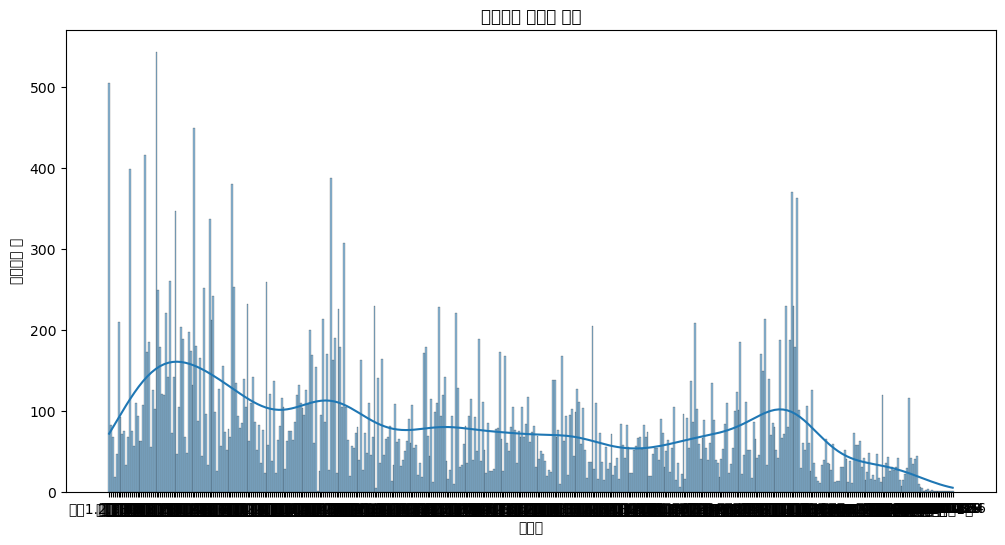

In [119]:
# 전체 행정동명 분포를 시각화 (히스토그램)
plt.figure(figsize=(12, 6))
sns.histplot(xy_no['행정동명'], bins=30, kde=True)
plt.xlabel('빈도수')
plt.ylabel('행정동명 수')
plt.title('행정동명 빈도수 분포')
plt.show()

In [123]:

# 1. 각 데이터프레임의 행정동명별 개수 계산
xy_no_counts = xy_no['행정동명'].value_counts().reset_index()
xy_no_counts.columns = ['행정동명', 'xy_no_count']

df7_counts = df7['행정동명'].value_counts().reset_index()
df7_counts.columns = ['행정동명', 'df7_count']

# 2. 두 데이터프레임 병합 (행정동명 기준)
merged_counts = pd.merge(xy_no_counts, df7_counts, on='행정동명', how='outer')

# 3. 결측값을 0으로 채우기 (한쪽에만 있는 행정동명에 대한 처리)
merged_counts = merged_counts.fillna(0)

# 4. 각 열을 정수형으로 변환 (결측치 처리 후)
merged_counts['xy_no_count'] = merged_counts['xy_no_count'].astype(int)
merged_counts['df7_count'] = merged_counts['df7_count'].astype(int)

# 5. 결과 출력
display(merged_counts)

,행정동명,xy_no_count,df7_count
0,20200102,0,69
1,20200103,1,64
2,20200106,0,47
3,20200107,3,45
4,20200108,1,54
...,...,...,...
496,효창동,13,105
497,후암동,36,484
498,휘경제1동,64,716
499,휘경제2동,26,81


In [128]:
xy_no

,업소명,업종명,업태명,소재지도로명,소재지지번,허가신고일,영업자시작일,소재지시작일,행정동명,폐업일자,폐업구분,폐업사유,소재지_앞,소재지_뒤,소재지_앞_지하X,0,1
147,커플이야,일반음식점,기타,None,서울특별시 종로구 익선동 148번지,20190812,20190812,20190812.0,종로1.2.3.4가동,NaT,NaN,NaN,,None,,NaN,NaN
1235,광주수산,일반음식점,일식,"서울특별시 중구 퇴계로85길 지하 56, 신당지하쇼핑센터 지하1층 55호 (황학동)",서울특별시 중구 황학동 370번지 1호 신당지하쇼핑센터,20190312,20190312,20190312.0,황학동,NaT,NaN,NaN,서울특별시 중구 퇴계로85길 지하 56,신당지하쇼핑센터 지하1층 55호 (황학동),서울특별시 중구 퇴계로85길 56,NaN,NaN
2170,크로크로 행당역점,일반음식점,기타,"서울특별시 성동구 행당로 지하 89, 행당역 539-303호 (행당동)",서울특별시 성동구 행당동 317번지 241호 행당역,20190411,20190411,20190411.0,사근동,NaT,NaN,NaN,서울특별시 성동구 행당로 지하 89,행당역 539-303호 (행당동),서울특별시 성동구 행당로 89,NaN,NaN
3095,어묵나라,휴게음식점,일반조리판매,"서울특별시 광진구 천호대로 지하 657, 5호선 아차산역545 지하2층 203호 (능동)",서울특별시 광진구 능동 256번지 16호 5호선 아차산역545-203호,20190903,20190903,20190903.0,능동,NaT,NaN,NaN,서울특별시 광진구 천호대로 지하 657,5호선 아차산역545 지하2층 203호 (능동),서울특별시 광진구 천호대로 657,NaN,NaN
3099,뚝섬수영장 카페테리아,휴게음식점,패스트푸드,None,서울특별시 광진구 자양동 112번지 1층 한강뚝섬 수영장내,20190715,20190715,20190715.0,자양제3동,2019-08-25,기타,조건부기간 완료에 따른 폐업처리,,None,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364541,황금마차,휴게음식점,푸드트럭,"서울특별시 종로구 세종대로 지하 189, 세종로지하주차장 지상 세종로공원 푸드존 (...",서울특별시 종로구 세종로 80번지 1호 세종로지하주차장 지상 세종로공원 푸드존,20240131,20240131,20240131.0,사직동,NaT,NaN,NaN,서울특별시 종로구 세종대로 지하 189,세종로지하주차장 지상 세종로공원 푸드존 (세종로),서울특별시 종로구 세종대로 189,NaN,NaN
365180,뚝썸 썰매장 빙어튀김,휴게음식점,일반조리판매,None,서울특별시 광진구 자양동 112번지 한강공원 뜩섬 눈썰매장,20240112,20240112,20240112.0,자양제3동,2024-02-12,기타,조건부기간 완료에 따른 폐업처리(자동폐업),,None,,NaN,NaN
365335,프랭크버거 반포고투몰점,일반음식점,기타,"서울특별시 서초구 신반포로 지하 200, 강남터미널지하쇼핑몰 지하1층 G-008호 ...",서울특별시 서초구 잠원동 68번지 17호 강남터미널지하쇼핑몰 지하1층 G-008,20240109,20240109,20240109.0,반포제3동,NaT,NaN,NaN,서울특별시 서초구 신반포로 지하 200,강남터미널지하쇼핑몰 지하1층 G-008호 (잠원동),서울특별시 서초구 신반포로 200,NaN,NaN
365434,오목교역점 먹거리푸드24,휴게음식점,패스트푸드,"서울특별시 양천구 오목로 지하 342, 오목교역 지하2층 208호 (목동)",서울특별시 양천구 목동 406번지 30호 오목교역,20240105,20240105,20240105.0,목1동,NaT,NaN,NaN,서울특별시 양천구 오목로 지하 342,오목교역 지하2층 208호 (목동),서울특별시 양천구 오목로 342,NaN,NaN


# df7

In [131]:
df7['소재지지번']

array(['서울특별시 종로구 돈의동  137번지  피카디리플러스', '서울특별시 종로구 누하동  1번지 11호  ',
       '서울특별시 종로구 동숭동  129번지 144호  ', ..., '서울특별시 광진구 군자동  465번지 17호  ',
       '서울특별시 금천구 독산동  1077번지 37호  천세약국', '서울특별시 동대문구 장안동  314번지 4호  '],
      dtype=object)

In [132]:
df7['소재지지번'] = df7['소재지지번'].astype(str)

In [133]:
# '행정구' 변수 생성
df7['행정구명'] = df7['소재지지번'].apply(lambda x: x.split(' ')[1] if len(x.split(' ')) > 1 else None) 

# 결과 출력
print(df7[['소재지지번', '행정구명']])

                                      소재지지번  행정구명
0             서울특별시 종로구 돈의동  137번지  피카디리플러스   종로구
1                  서울특별시 종로구 누하동  1번지 11호     종로구
2               서울특별시 종로구 동숭동  129번지 144호     종로구
3           서울특별시 종로구 사직동  9번지  광화문 풍림스페이스본   종로구
4                서울특별시 종로구 창신동  330번지 53호     종로구
...                                     ...   ...
365645      서울특별시 금천구 독산동  1077번지 37호  천세약국   금천구
365646           서울특별시 동대문구 장안동  314번지 4호    동대문구
365647            서울특별시 중랑구 면목동  91번지 31호     중랑구
365648          서울특별시 노원구 상계동  713번지  롯데백화점   노원구
365649  서울특별시 금천구 가산동  60번지 8호  현대시티아울렛 가산점   금천구

[365650 rows x 2 columns]


In [159]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365650 entries, 0 to 365649
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   업소명        365650 non-null  object        
 1   업종명        365650 non-null  object        
 2   업태명        363497 non-null  object        
 3   소재지도로명     330959 non-null  object        
 4   소재지지번      365650 non-null  object        
 5   허가신고일      365650 non-null  int64         
 6   영업자시작일     365650 non-null  object        
 7   소재지시작일     363873 non-null  float64       
 8   행정동명       365165 non-null  object        
 9   폐업일자       131824 non-null  datetime64[ns]
 10  폐업구분       132343 non-null  object        
 11  폐업사유       99261 non-null   object        
 12  소재지_앞      365650 non-null  object        
 13  소재지_뒤      330958 non-null  object        
 14  소재지_앞_지하X  365650 non-null  object        
 15  0          328325 non-null  float64       
 16  1          328325 no

In [134]:
df7['행정구명'].isna().sum()

490

In [145]:
df7['행정구명'].value_counts()

행정구명
강남구     40399
마포구     22794
송파구     22760
영등포구    19119
서초구     18343
종로구     17138
강서구     17136
중구      15752
관악구     15466
강북구     14196
용산구     12915
강동구     12889
구로구     12523
동대문구    12251
광진구     12160
은평구     11959
성북구     10969
서대문구    10802
노원구     10502
성동구     10445
양천구     10065
중랑구      9535
동작구      8926
금천구      8874
도봉구      7230
고양시         2
성남시         2
고성군         1
평창군         1
부천시         1
제주시         1
의정부시        1
수영구         1
하남시         1
수원시         1
Name: count, dtype: int64

In [149]:
df7['행정구명'].nunique() #25개 여야함

35

In [150]:
df7['행정구명'].value_counts().sort_values() # 위에 10개 날리기

행정구명
수원시         1
고성군         1
평창군         1
부천시         1
하남시         1
의정부시        1
수영구         1
제주시         1
성남시         2
고양시         2
도봉구      7230
금천구      8874
동작구      8926
중랑구      9535
양천구     10065
성동구     10445
노원구     10502
서대문구    10802
성북구     10969
은평구     11959
광진구     12160
동대문구    12251
구로구     12523
강동구     12889
용산구     12915
강북구     14196
관악구     15466
중구      15752
강서구     17136
종로구     17138
서초구     18343
영등포구    19119
송파구     22760
마포구     22794
강남구     40399
Name: count, dtype: int64

In [152]:
df7['행정구명'].value_counts()[df7['행정구명'].value_counts() < 2]

행정구명
고성군     1
평창군     1
부천시     1
제주시     1
의정부시    1
수영구     1
하남시     1
수원시     1
Name: count, dtype: int64

In [153]:
to_remove = df7['행정구명'].value_counts()[df7['행정구명'].value_counts() < 3].index

# 행정구 개수가 2개 이하인 '행정구명'을 가진 행 제거
df7_filtered = df7[~df7['행정구명'].isin(to_remove)]

In [156]:
df7_filtered['행정구명'].nunique() #행정구 25개됨

25

# df8

In [157]:
df8 = df7_filtered.copy()

In [158]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365638 entries, 0 to 365649
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   업소명        365638 non-null  object        
 1   업종명        365638 non-null  object        
 2   업태명        363485 non-null  object        
 3   소재지도로명     330949 non-null  object        
 4   소재지지번      365638 non-null  object        
 5   허가신고일      365638 non-null  int64         
 6   영업자시작일     365638 non-null  object        
 7   소재지시작일     363861 non-null  float64       
 8   행정동명       365153 non-null  object        
 9   폐업일자       131815 non-null  datetime64[ns]
 10  폐업구분       132334 non-null  object        
 11  폐업사유       99252 non-null   object        
 12  소재지_앞      365638 non-null  object        
 13  소재지_뒤      330949 non-null  object        
 14  소재지_앞_지하X  365638 non-null  object        
 15  0          328315 non-null  float64       
 16  1          328315 non-nul

In [181]:
# 'x'가 결측치인 경우의 '행정구명' 개수
x_null_count = df8[df8['1'].isnull()]['행정구명'].value_counts()

# 'x'가 결측치가 아닌 경우의 '행정구명' 개수
x_non_null_count = df8['행정구명'].value_counts()

In [161]:
x_null_count

행정구명
송파구     2854
강남구     2317
마포구     2223
구로구     2206
서초구     2194
관악구     2111
영등포구    1724
중구      1721
강동구     1715
동대문구    1621
종로구     1564
강서구     1475
성북구     1355
서대문구    1341
양천구     1248
노원구     1214
은평구     1142
금천구     1074
강북구     1038
용산구     1015
도봉구      956
동작구      923
광진구      852
중랑구      724
성동구      686
Name: count, dtype: int64

In [182]:
x_non_null_count

행정구명
강남구     40399
마포구     22794
송파구     22760
영등포구    19119
서초구     18343
종로구     17138
강서구     17136
중구      15752
관악구     15466
강북구     14196
용산구     12915
강동구     12889
구로구     12523
동대문구    12251
광진구     12160
은평구     11959
성북구     10969
서대문구    10802
노원구     10502
성동구     10445
양천구     10065
중랑구      9535
동작구      8926
금천구      8874
도봉구      7230
Name: count, dtype: int64

In [184]:
# 두 시리즈를 데이터프레임으로 합치기
df8_1 = pd.concat([x_null_count, x_non_null_count], axis=1)
df8_1.columns = ['x_null_count', 'x_non_null_count']

In [185]:
df8_1

,x_null_count,x_non_null_count
행정구명,,
송파구,2854,22760
강남구,2317,40399
마포구,2223,22794
구로구,2206,12523
서초구,2194,18343
관악구,2111,15466
영등포구,1724,19119
중구,1721,15752
강동구,1715,12889


In [192]:
# 비율 계산 (x_null_count / x_non_null_count)
df8_1['ratio'] = round( df8_1.iloc[:,0] / df8_1.iloc[:,1] , 2)

In [193]:
df8_1

,x_null_count,x_non_null_count,ratio
행정구명,,,
송파구,2854,22760,0.13
강남구,2317,40399,0.06
마포구,2223,22794,0.10
구로구,2206,12523,0.18
서초구,2194,18343,0.12
관악구,2111,15466,0.14
영등포구,1724,19119,0.09
중구,1721,15752,0.11
강동구,1715,12889,0.13


'행정구명'의 좌표 결측치 행/전체 행이 약0.1로 유사하기 때문에 데이터가 쏠림없이 고르게 결측치가 존재한다고 판단. 따라서 결측치 제거.